# Import Libraries for Visualizations

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import xgboost as xg
from sklearn.preprocessing import OneHotEncoder
from xgboost import plot_importance
from math import sqrt
from feature_engine.outliers import Winsorizer
import phik
import warnings
warnings.filterwarnings("ignore")

# Import & Display Dataset 

In [2]:
# Loading dataset
clustered_data = pd.read_csv('clustered_data.csv', encoding='ISO-8859-1')

In [3]:
# Display first 5 dataset
clustered_data.head()

,ship_mode,segment,city,state,region,category,sub-category,sales,quantity,discount,profit,order_year,order_month,order_day,order_day_of_week,is_weekend,shipping_duration,unit_price,price_cluster,distinct_cluster_label
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,2016,11,8,1,0,3,130.9800,0,Bookcases_0
1,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522,2015,9,17,3,0,4,440.4900,1,Bookcases_1
2,Standard Class,Home Office,Houston,Texas,Central,Furniture,Bookcases,532.3992,3,0.32,-46.9764,2015,12,27,6,1,4,177.4664,0,Bookcases_0
3,First Class,Home Office,New York City,New York,East,Furniture,Bookcases,899.1360,4,0.20,112.3920,2015,10,12,0,0,2,224.7840,0,Bookcases_0
4,First Class,Home Office,New York City,New York,East,Furniture,Bookcases,626.3520,3,0.20,46.9764,2015,10,12,0,0,2,208.7840,0,Bookcases_0


In [4]:
# Display value counts for price_cluster
print(clustered_data['price_cluster'].value_counts())

price_cluster
0    6464
1    3498
2      32
Name: count, dtype: int64


In [24]:
# Display value counts for price_cluster
print(clustered_data['distinct_cluster_label'].value_counts())

distinct_cluster_label
Binders_0        1498
Paper_0          1072
Furnishings_0     827
Phones_1          788
Accessories_0     718
Storage_1         687
Art_1             637
Chairs_1          429
Appliances_0      405
Labels_0          356
Paper_1           273
Envelopes_1       217
Bookcases_0       215
Tables_0          215
Chairs_0          188
Supplies_0        181
Fasteners_0       175
Storage_0         159
Art_0             158
Furnishings_1     130
Tables_1          104
Phones_0          101
Machines_0         96
Copiers_0          63
Appliances_1       61
Accessories_1      57
Fasteners_1        42
Envelopes_0        37
Binders_1          25
Paper_2            25
Machines_1         19
Bookcases_1        13
Labels_1            8
Supplies_2          6
Copiers_1           5
Supplies_1          3
Art_2               1
Name: count, dtype: int64


---

# Exploratory Data Analysis 

In this section, we will do analysis based on dataset after clustering

## Distribution of Price Cluster 

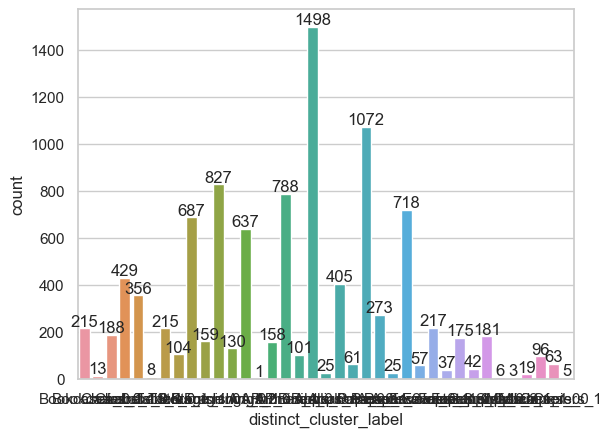

In [25]:
# Display plot cluster based on count
sns.set(style="whitegrid", palette='viridis')
ax = sns.countplot(x='distinct_cluster_label', data=clustered_data, label='Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

From the bar chart above the price_cluster with the highest count is price_cluster 0 with 6464 values followed by price_cluster 1 with 3498 values, and the lowest ones is price_cluster 2 with 32 values.

Text(0, 0.5, 'sales')

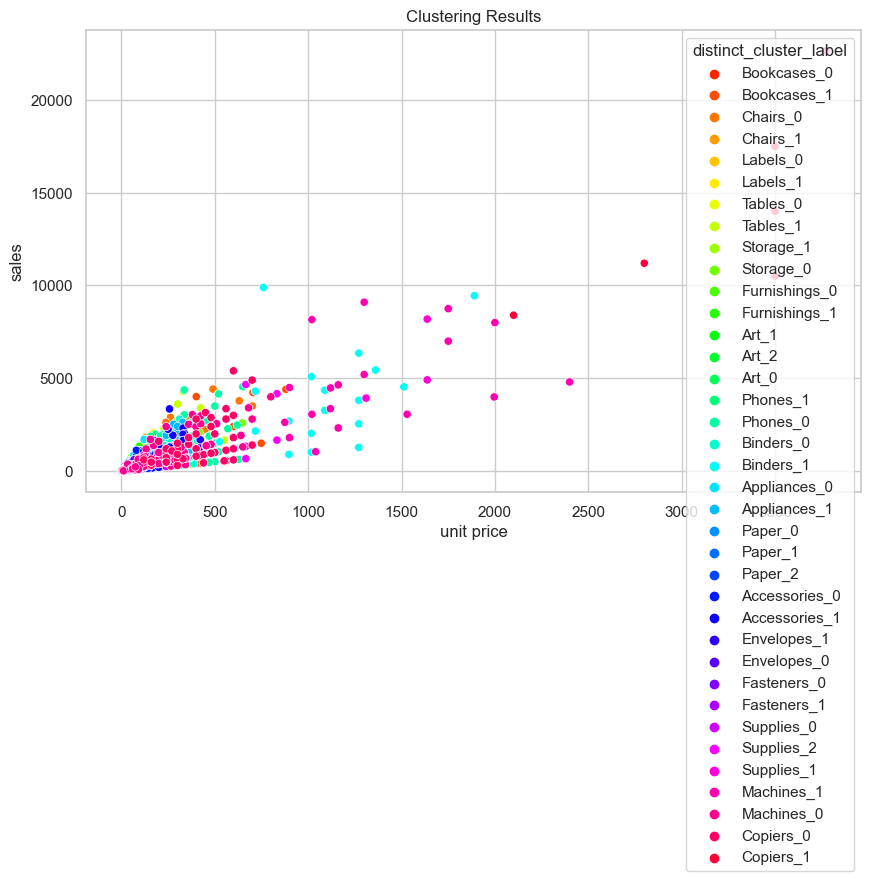

In [27]:
# Display scatter plot for price_cluster
plt.figure(figsize = (10, 6))
sns.scatterplot(x=clustered_data['unit_price'], y=clustered_data['sales'], hue = clustered_data['distinct_cluster_label'], palette='hsv')
plt.title("Clustering Results")
plt.xlabel("unit price")
plt.ylabel("sales")

Then, we selected numerical columns from clustered data for visualization

In [6]:
# Show the distribution of numerical column 
numerical_columns = clustered_data.select_dtypes(include=np.number).columns

print("numerical columns:")
print(numerical_columns)

numerical columns:
Index(['sales', 'quantity', 'discount', 'profit', 'order_year', 'order_month',
       'order_day', 'order_day_of_week', 'is_weekend', 'shipping_duration',
       'unit_price', 'price_cluster'],
      dtype='object')


In [7]:
# Define df_num as new data frame contain numerical column
df_num = clustered_data[numerical_columns].copy()

In table below, we create an average of all numerical features against the price cluster 

In [23]:
# Display mean cluster
# clustered_data.groupby('distinct_cluster_label').mean()

- Based on average sales, price_cluster 2 have the most highest values followed by price_cluster 1 and the least values comes from price_cluster 0.
- For average profit and unit_price, they have similar pattern with average sales.

Then based on the insight above, we define the df_viz for price_cluster 0 as "cheap", 1 as "medium", 2 as"expensive" following the pattern.

In [9]:
# Define dfviz for visualization
df_viz = clustered_data.copy()
df_viz['price_cluster'] = df_viz['price_cluster'].map({0: "cheap", 1: "medium", 2: "expensive"})

## Distribution of price_cluster against segment

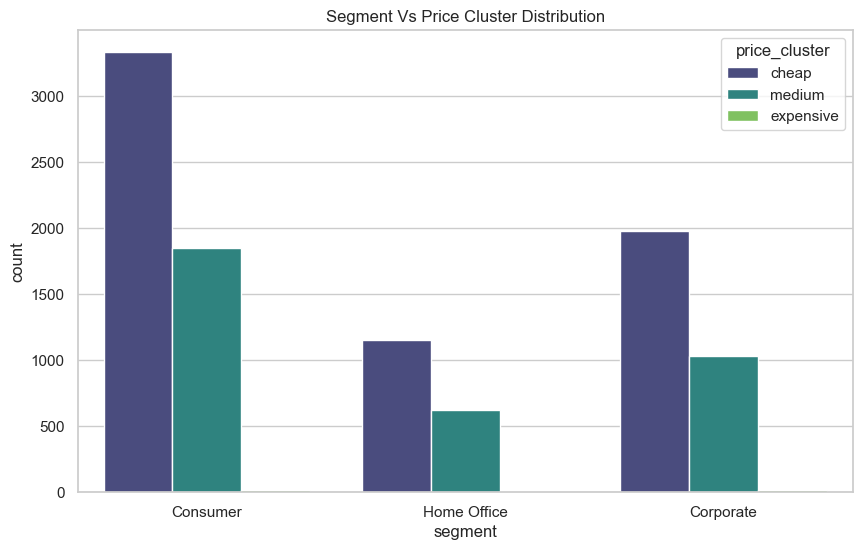

In [10]:
# Create pallete Viridis
target_colors1 = plt.cm.viridis([0.2, 0.5, 0.8, 1.0])  

fig = plt.figure(figsize=(22,6))
# plt.suptitle('Segment Vs Region',weight='bold',fontsize=20)
grid = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)

# create bar chart contain count
ax1 = fig.add_subplot(grid[0,:1])
ax1.set_title('Segment Vs Price Cluster Distribution')
# using seaborn to create chart
sns.countplot(x='segment', data=df_viz, ax=ax1, hue= df_viz['price_cluster'], palette=target_colors1)

plt.show()

From the bar chart that visualize segment against price_cluster, we can see that the highest segment is consumer, followed by corporate and home office. The price_cluster distributions against the three segments have almost the same pattern, cheap price always occupied the highest records, the second place is medium price followed by expensive price as the least values.

## Distribution of price_cluster against profit and sales

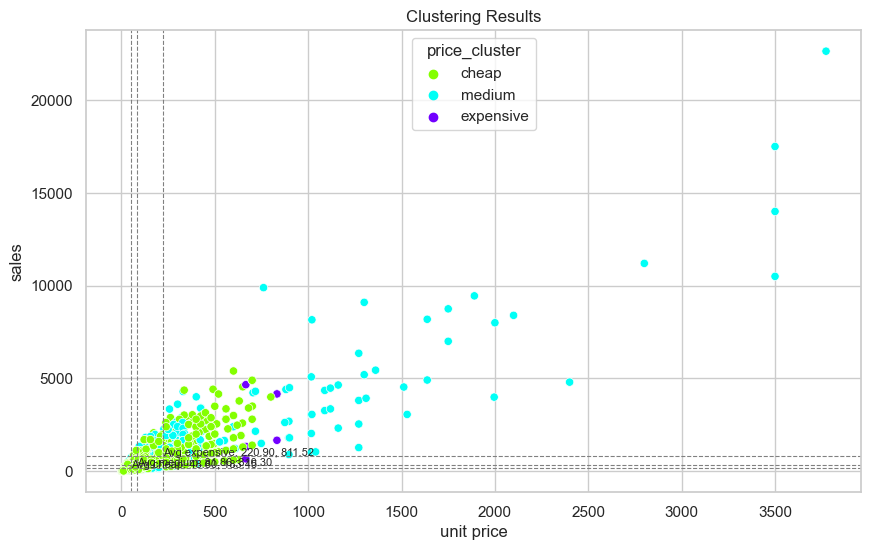

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average for each price_cluster
average_data = df_viz.groupby('price_cluster').agg({'unit_price': 'mean', 'sales': 'mean'}).reset_index()

# Your existing code to create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_viz['unit_price'], y=df_viz['sales'], hue=df_viz['price_cluster'], palette='hsv')
plt.title("Clustering Results")
plt.xlabel("unit price")
plt.ylabel("sales")

# Plot average lines
for index, row in average_data.iterrows():
    plt.axvline(x=row['unit_price'], color='grey', linestyle='--', linewidth=0.8)
    plt.axhline(y=row['sales'], color='grey', linestyle='--', linewidth=0.8)

# Display legend with average values
for index, row in average_data.iterrows():
    plt.text(row['unit_price'], row['sales'], f'Avg {row["price_cluster"]}: {row["unit_price"]:.2f}, {row["sales"]:.2f}', fontsize=8)

plt.show()


Text(0, 0.5, 'sales')

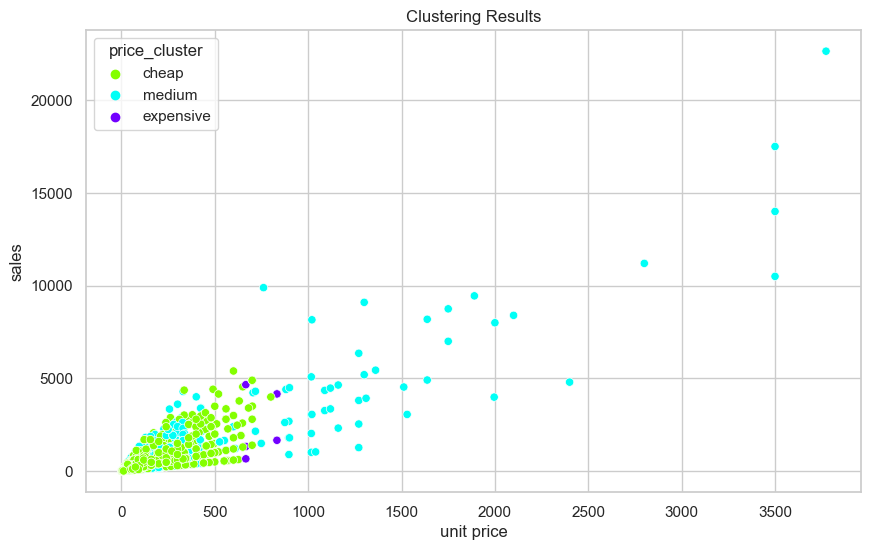

In [18]:
# Display scatter plot for price_cluster
plt.figure(figsize = (10, 6))
sns.scatterplot(x=df_viz['unit_price'], y=df_viz['sales'], hue = df_viz['price_cluster'], palette='hsv')
plt.title("Clustering Results")
plt.xlabel("unit price")
plt.ylabel("sales")

- From scatter plot above we can see that the distribution cheap cluster is dominated with 0-5000 sales and profit varied between profit loss 0 to -4000 while the profit reach almost 3000
- for medium cluster we can see that the distribution with 

## Correlation between price_cluster against other features

<Axes: >

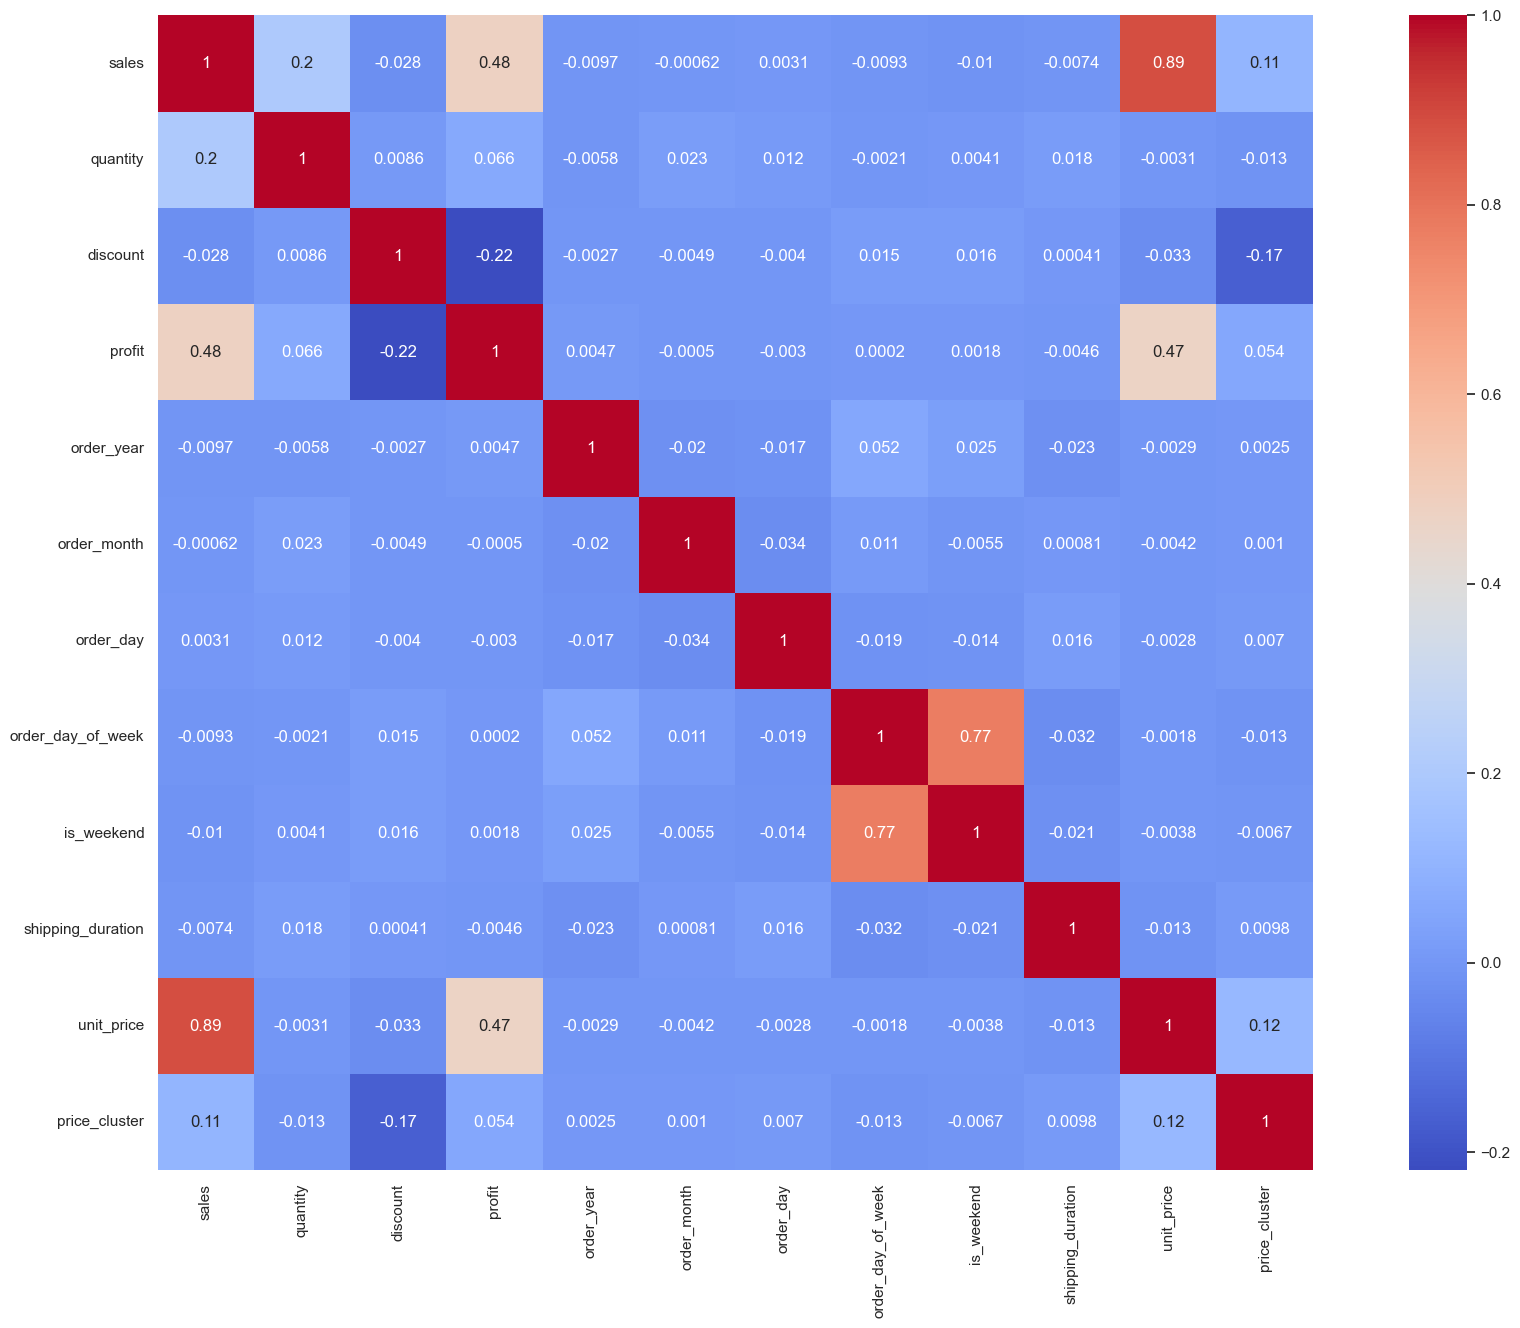

In [12]:
# define corr to calcuate correlation from df_num
corr = df_num.corr()
plt.figure(figsize = (25, 15))
sns.heatmap(corr, square = True, annot = True, cmap = 'coolwarm')

From the heatmap, almost all the features have weak correlation with price_cluster except some of the features that shows bigger correlation than other features with the target. 

Then we selected the features that shows a some corellation as an important features

In [13]:
# Selecting important feature with more than 0.05
important_features = list(corr[corr['price_cluster'] > 0.05].index)

In [14]:
# Display feature
important_features

['sales', 'profit', 'unit_price', 'price_cluster']

## Important Features against price cluster

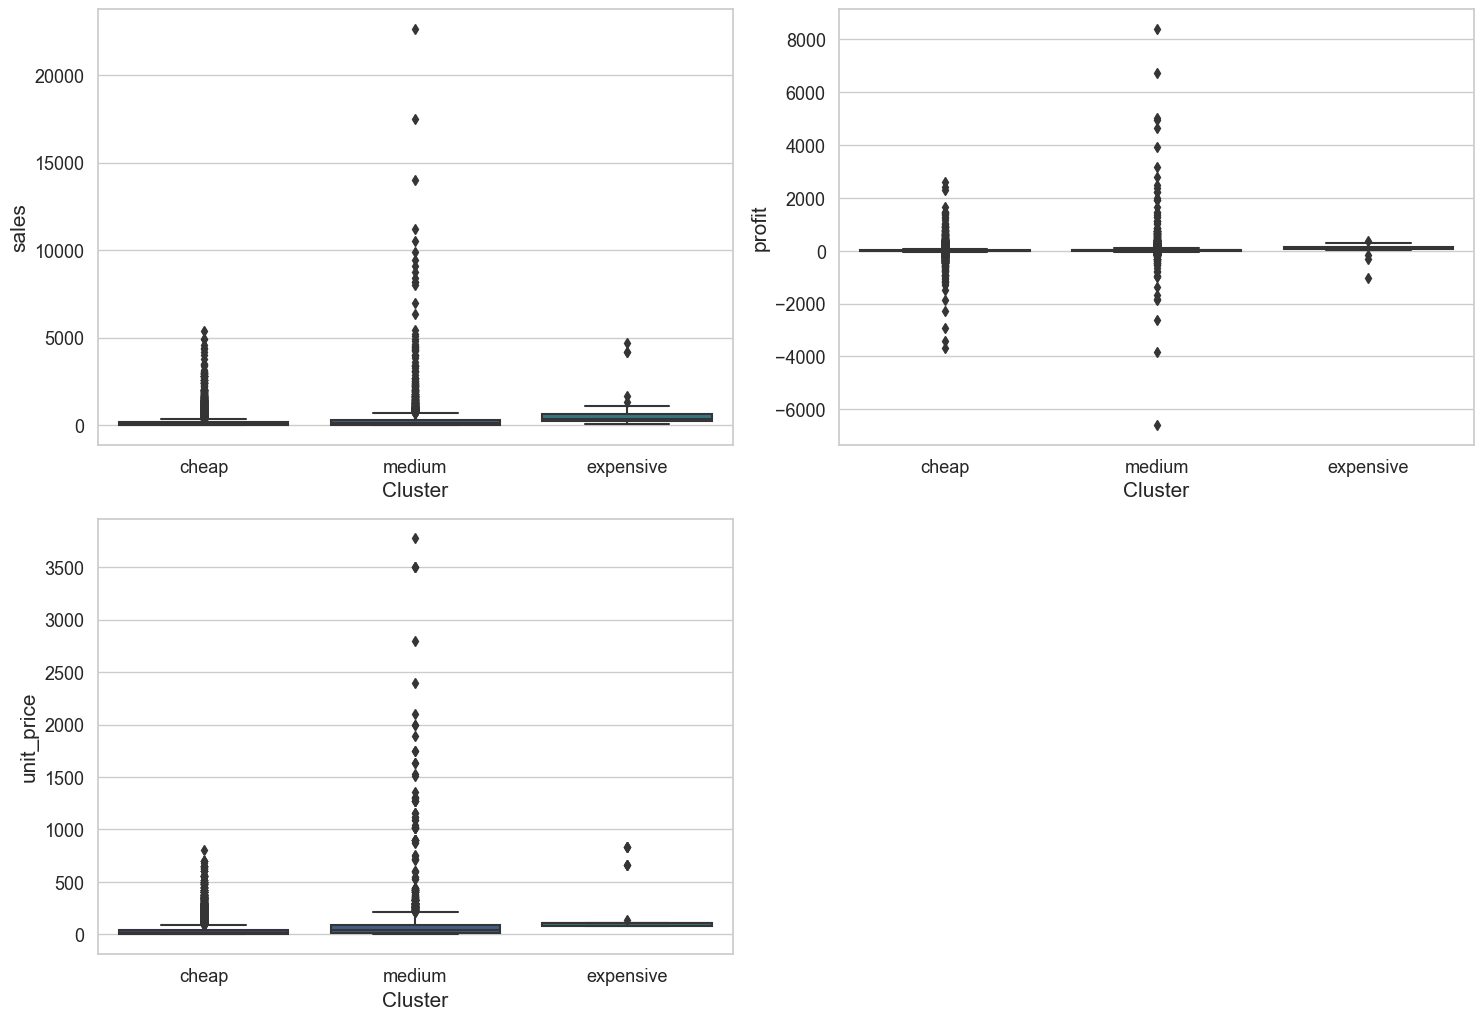

In [16]:
# Display boxplot from important feature
plt.figure(figsize = (15, 20))
for i, col in enumerate(important_features[:-1]):
    ax = plt.subplot(4, 2, i+1)
    sns.boxplot(x = df_viz['price_cluster'], y = df_viz[col])
    plt.xlabel("Cluster", fontsize = 15)
    plt.ylabel(col, fontsize = 15)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)


plt.tight_layout()
plt.show()